In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/kaggle/input/playground-series-s4e6/train.csv')
df_test = pd.read_csv( '/kaggle/input/playground-series-s4e6/test.csv')
df_sample=pd.read_csv('/kaggle/input/playground-series-s4e6/sample_submission.csv')

In [3]:
                                  '''SOMETHING UNIVERSAL CODE MADNESS (USING PANDAS)'''
import pandas as pd    
        
def check_columns(df, df_test):
    extra_columns_df = [col for col in df.columns if col not in df_test.columns]
    extra_columns_df_test = [col for col in df_test.columns if col not in df.columns]
    if extra_columns_df or extra_columns_df_test:
        print("Extra_columns_in_df",extra_columns_df)
        '''print(extra_columns_df_test)'''
    else:
        return None


def check_columns_dtype(df,df_test):
    print(df.dtypes.value_counts())
    print()
    print(df_test.dtypes.value_counts())
    print()


def to_predict(df_sample):
    print("We have to predict the:",df_sample.columns)
    
    
    
def check_null_values(df,df_test):
    print("NUll values in the df:"), print(df.isnull().sum()),print()
    print("Null values in the df_test:"),print(df_test.isnull().sum())
    

                                         
'''MAIN CDOE'''        

df = pd.read_csv('/kaggle/input/playground-series-s4e6/train.csv')
df_test = pd.read_csv( '/kaggle/input/playground-series-s4e6/test.csv')
df_sample=pd.read_csv('/kaggle/input/playground-series-s4e6/sample_submission.csv')


check_columns(df, df_test), print(),print()

check_columns_dtype(df,df_test),print()

to_predict(df_sample), print(), print()

check_null_values(df,df_test)


# WE CAN ALSO USE:- print(df.info())

# SHAPE FUNCTION DOES'NT MATTER SO NO NEED TO CHECK THAT"
# x=df["FloodProbability"]
# print(type(x))  """will retrun the dataset type not the datatype of the columns"""
# print(df["FloodProbability"].dtype)   '''IT WILL RETURN FLOAT64'''

Extra_columns_in_df ['Target']


int64      30
float64     7
object      1
Name: count, dtype: int64

int64      30
float64     7
Name: count, dtype: int64


We have to predict the: Index(['id', 'Target'], dtype='object')


NUll values in the df:
id                                                0
Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                

In [4]:
target =df.Target
target.nunique

<bound method IndexOpsMixin.nunique of 0        Graduate
1         Dropout
2         Dropout
3        Enrolled
4        Graduate
           ...   
76513    Graduate
76514    Graduate
76515    Enrolled
76516     Dropout
76517    Graduate
Name: Target, Length: 76518, dtype: object>

In [5]:
df.head()

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0,1,1,1,9238,1,1,126.0,1,1,...,0,6,7,6,12.428571,0,11.1,0.6,2.02,Graduate
1,1,1,17,1,9238,1,1,125.0,1,19,...,0,6,9,0,0.000000,0,11.1,0.6,2.02,Dropout
2,2,1,17,2,9254,1,1,137.0,1,3,...,0,6,0,0,0.000000,0,16.2,0.3,-0.92,Dropout
3,3,1,1,3,9500,1,1,131.0,1,19,...,0,8,11,7,12.820000,0,11.1,0.6,2.02,Enrolled
4,4,1,1,2,9500,1,1,132.0,1,19,...,0,7,12,6,12.933333,0,7.6,2.6,0.32,Graduate


In [6]:
Pq= df['Previous qualification (grade)']
Pq.mean()
# df.dropna(inplace=True) , inplace=True is to save the data with dropped values

132.37876578060062

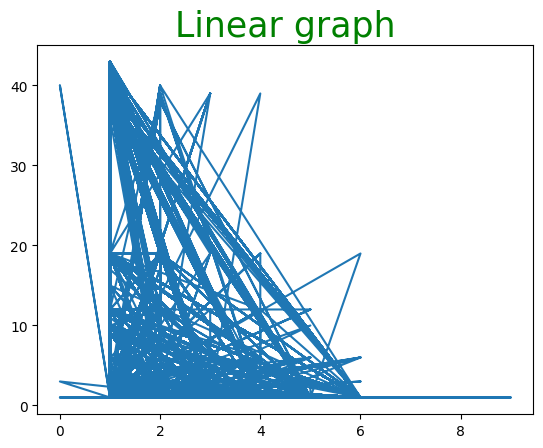

In [7]:
x=df['Application order']
y=df['Previous qualification']

plt.plot(x, y)
plt.title("Linear graph",fontsize=25, color="green")
plt.show()

In [8]:
X= df.drop(["Target"],axis=1)
y=df["Target"]

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix



# Separate features and target variable from training and testing datasets
X = df.drop(["Target"], axis=1)
y= df["Target"]
# X_test = df_test
# y_test = df_test["Target"]

# Standardize the features (KNN performance improves with standardized data)
# scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# Initialize the KNN classifier with k=5 (you can adjust k as needed)
knn = KNeighborsClassifier(n_neighbors=5)

# Train the classifier
knn.fit(X,y)

# Make predictions on the test set
y_pred = knn.predict(df_test)

# Evaluate the model
# print("Accuracy:", accuracy_score(y_test, y_pred))
# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
# print("Classification Report:\n", classification_report(y_test, y_pred))

In [10]:
test=df_test
test_ids=df_test["id"]
y_pred=knn.predict(test)

In [11]:
results = pd.DataFrame({'id':test_ids,'Target':y_pred})
results.to_csv('output.csv',index=False)

In [12]:
# df_sample.head()

In [13]:
# df_output=pd.read_csv('/kaggle/working/output.csv')
# df_output.head()